
## Penguin_KG
- 목표 : 추가 데이터없이, 제공된 데이터만을 활용하여 펭귄의 몸무게를 예측하기
- https://dacon.io/competitions/official/235862/overview/description

> id : 샘플 아이디  
> Species: 펭귄의 종을 나타내는 문자열  
> Island : 샘플들이 수집된 Palmer Station 근처 섬 이름  
> Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기  
> Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이  
> Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이  
> Flipper Length (mm) : 펭귄의 팔(날개) 길이  
> Sex : 펭귄의 성별  
> Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율  
> Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율  
> Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)  

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_ = pd.read_csv("./train.csv")

C:\Users\user\anaconda3\envs\tf115\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


                     Culmen Length (mm)  Culmen Depth (mm)  \
Culmen Length (mm)             1.000000          -0.251255   
Culmen Depth (mm)             -0.251255           1.000000   
Flipper Length (mm)            0.672205          -0.603341   
Delta 15 N (o/oo)             -0.038911           0.645813   
Delta 13 C (o/oo)              0.111280           0.474151   
Body Mass (g)                  0.572063          -0.490643   

                     Flipper Length (mm)  Delta 15 N (o/oo)  \
Culmen Length (mm)              0.672205          -0.038911   
Culmen Depth (mm)              -0.603341           0.645813   
Flipper Length (mm)             1.000000          -0.524236   
Delta 15 N (o/oo)              -0.524236           1.000000   
Delta 13 C (o/oo)              -0.446668           0.641107   
Body Mass (g)                   0.864814          -0.543740   

                     Delta 13 C (o/oo)  Body Mass (g)  
Culmen Length (mm)            0.111280       0.572063  
Culmen Dept

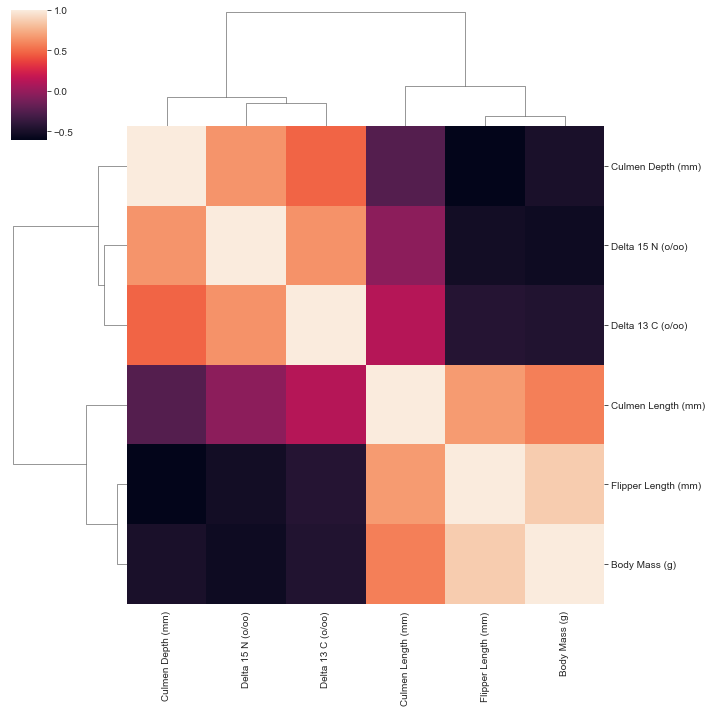

In [2]:
# 데이터 EDA

numericdata = data_[['Culmen Length (mm)','Culmen Depth (mm)', 'Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Body Mass (g)']]

numericdata['Delta 15 N (o/oo)'].fillna(numericdata['Delta 15 N (o/oo)'].mean(), inplace=True)
numericdata['Delta 13 C (o/oo)'].fillna(numericdata['Delta 13 C (o/oo)'].mean(), inplace=True)

print(numericdata.corr())

sns.set_style('darkgrid')
sns.clustermap(numericdata.corr())

## 데이터 전처리(결측치 제거)

In [4]:
# 데이터 결합
sub = pd.get_dummies(data_[['Species', 'Island', 'Sex', 'Clutch Completion']])
data = pd.concat([data_['id'], sub ,data_.iloc[:,4:7], data_.iloc[:,8:]], axis=1)

# 결측치 (1) ~ 평균치를 통한 결측 대치
data['Delta 15 N (o/oo)'].fillna(data['Delta 15 N (o/oo)'].mean(), inplace=True)
data['Delta 13 C (o/oo)'].fillna(data['Delta 13 C (o/oo)'].mean(), inplace=True)


## 결측치 (2) ~ 성별? How to?
#  1) 일단 제거 후 학습 진행
data_without = data.dropna()
data_without

,id,Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,Sex_FEMALE,Sex_MALE,Clutch Completion_No,Clutch Completion_Yes,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,0,0,1,1,0,0,0,1,0,1,50.0,15.3,220,8.305150,-25.190170,5550
1,1,0,1,0,0,1,0,0,1,1,0,49.5,19.0,200,9.630740,-24.346840,3800
2,2,0,0,1,1,0,0,1,0,0,1,45.1,14.4,210,8.519510,-27.018540,4400
3,3,0,0,1,1,0,0,1,0,0,1,44.5,14.7,214,8.201060,-26.165240,4850
4,4,0,0,1,1,0,0,0,1,1,0,49.6,16.0,225,8.383240,-26.842720,5700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,1,0,0,0,0,1,1,0,0,1,36.6,17.8,185,8.737634,-25.723051,3700
110,110,1,0,0,0,1,0,0,1,0,1,39.2,18.6,190,9.110060,-25.795490,4250
111,111,1,0,0,0,1,0,0,1,0,1,43.2,18.5,192,8.970250,-26.036790,4100
112,112,0,1,0,0,1,0,1,0,1,0,46.9,16.6,192,9.805890,-24.737350,2700


## 모델 Search

- 데이터 수가 적기때문에, 딥러닝보다는 머신러닝으로 채택할 예정

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [6]:
X = data_without.iloc[:,1:-1]
y = data_without.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=44)

In [7]:
model = Ridge().fit(x_train, y_train)
print(f'Ridge: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

model = Lasso().fit(x_train, y_train)
print(f'Lasso: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

model = DecisionTreeRegressor().fit(x_train, y_train)
print(f'DecisionTreeRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')
 
model = RandomForestRegressor().fit(x_train, y_train)
print(f'RandomForestRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

model = GradientBoostingRegressor().fit(x_train, y_train)
print(f'GradientBoostingRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

model = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)
print(f'KNeighborsRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

model = LinearRegression().fit(x_train, y_train)
print(f'LinearRegression: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

model = XGBRegressor().fit(x_train, y_train)
print(f'XGBRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

model = LGBMRegressor().fit(x_train, y_train)
print(f'LGBMRegressor: train_score: {model.score(x_train, y_train)}, val_score: {model.score(x_test, y_test)}')

Ridge: train_score: 0.8644240585206687, val_score: 0.8025134255872626
Lasso: train_score: 0.8661187798934845, val_score: 0.8076177741703313
DecisionTreeRegressor: train_score: 1.0, val_score: 0.4520756744812068
RandomForestRegressor: train_score: 0.9729928126420123, val_score: 0.7487060504931797
GradientBoostingRegressor: train_score: 0.9920864049785542, val_score: 0.6949936680634418
KNeighborsRegressor: train_score: 0.8517317825077685, val_score: 0.7141598866992105
LinearRegression: train_score: 0.8662637844857568, val_score: 0.8142226610158992
XGBRegressor: train_score: 0.9999999995549906, val_score: 0.6883419461833203
LGBMRegressor: train_score: 0.9007730007239413, val_score: 0.7642398373471202


In [8]:
# Val_score가 비교적 높은 LinearRegression 채택 (LinearRegression: train_score: 0.8662637844857568, val_score: 0.8142226610158992)

from sklearn.metrics import mean_squared_error

model_linear = LinearRegression().fit(x_train, y_train)
y_pred = model_linear.predict(x_test)

mean_squared_error(y_pred, y_test)**0.5


295.6491393272901

# Test 데이터 제출

In [94]:
testdt = pd.read_csv("./test.csv")

# 데이터 결합
sub = pd.get_dummies(testdt[['Species', 'Island', 'Sex', 'Clutch Completion']])
data = pd.concat([testdt['id'], sub ,testdt.iloc[:,4:7], testdt.iloc[:,8:]], axis=1)

# 결측치 (1) ~ 평균치를 통한 결측 대치
data['Delta 15 N (o/oo)'].fillna(data['Delta 15 N (o/oo)'].mean(), inplace=True)
data['Delta 13 C (o/oo)'].fillna(data['Delta 13 C (o/oo)'].mean(), inplace=True)

In [99]:
# test 데이터 예측
test_predict = model_linear.predict(data.iloc[:,1:])

In [103]:
# 파일 저장 및 제출
submission = pd.read_csv("./sample_submission.csv")
submission['Body Mass (g)'] = test_predict
submission.to_csv("./sample_submission.csv", index=False)